In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [47]:
# 데이터 소수점 지정
pd.options.display.precision = 2

# 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'


# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_raw = pd.read_csv('add_variable_customer.csv', encoding='euc-kr')

In [4]:
df_raw.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,여성,37,30,Yes,No,0,Yes,2,Yes,...,3,0,47910,431100,21,83590.48,1755400,2186500,20528,0
1,C-10002,남성,46,40,No,No,0,No,0,No,...,5,11300,12090,108710,21,68928.57,1447500,1567510,5176,538
2,C-10003,남성,50,50,No,No,0,No,0,Yes,...,1,0,38080,152100,4,98180.00,490900,643000,38025,0
3,C-10004,남성,78,70,Yes,No,0,Yes,1,Yes,...,1,0,31410,408720,13,112742.86,1578400,1987120,31440,0
4,C-10005,여성,75,70,Yes,No,0,Yes,3,Yes,...,1,0,8360,24970,3,94500.00,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20,No,No,0,No,0,No,...,4,0,52770,685680,25,64428.00,1610700,2296380,27427,0
6859,C-17040,남성,40,40,Yes,No,0,Yes,1,Yes,...,1,0,18310,402730,22,101891.30,2343500,2746230,18305,0
6860,C-17041,남성,22,20,No,No,0,No,0,Yes,...,5,0,21020,42040,14,56600.00,792400,834440,3002,0
6861,C-17042,남성,21,20,No,No,0,Yes,5,No,...,3,0,2370,160460,79,80107.59,6328500,6488960,2031,0


##### @Gender : 여성(1), 남성(0)

In [6]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)

##### @Married : Yes(1), No(0)

In [7]:
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)

##### @Referrals : Yes(1), No(0)

In [8]:
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)

##### @Dependents: Yes(1), No(0)

In [9]:
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)

##### @PaperlessBilling  : Yes(1), No(0)

In [10]:
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)

##### @PaymentMethod

In [11]:
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)

##### @OnlineSecurity

In [12]:
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)

##### @OnlineBackup  : Yes(1), No(0)

In [13]:
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)

##### @TechSupport  : Yes(1), No(0)

In [14]:
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)

##### @UnlimitedData : Yes(1), No(0)

In [15]:
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

# DT

In [16]:
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report


In [17]:
df_raw.drop(['CustomerId', 'StartDate', 'EndDate',
             'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=True)

In [18]:
# df_raw.drop('CustomerLTV', axis=1, inplace=True)

## 데이터 분할

In [37]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop('ChurnLabel', axis=1, inplace=False)
df_raw_y = df_raw['ChurnLabel']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size=0.35, random_state=42)

In [38]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                6863 non-null   int64  
 1   Age                   6863 non-null   int64  
 2   AgeGroup              6863 non-null   int64  
 3   Married               6863 non-null   int64  
 4   Dependents            6863 non-null   int64  
 5   noDependents          6863 non-null   int64  
 6   Referrals             6863 non-null   int64  
 7   noReferrals           6863 non-null   int64  
 8   PaperlessBilling      6863 non-null   int64  
 9   PaymentMethod         6863 non-null   int64  
 10  OnlineSecurity        6863 non-null   int64  
 11  OnlineBackup          6863 non-null   int64  
 12  TechSupport           6863 non-null   int64  
 13  UnlimitedData         6863 non-null   int64  
 14  AvgDownloadGB         6863 non-null   int64  
 15  ChurnLabel           

In [39]:
print('분할 전 설명변수 데이터: ', df_raw_x.shape)
print('분할 후 설명변수 데이터 \ntrain : ', df_train_x.shape, ' test: ', df_test_x.shape)

분할 전 설명변수 데이터:  (6863, 27)
분할 후 설명변수 데이터 
train :  (4460, 27)  test:  (2403, 27)


In [40]:
tree_uncustomized = DecisionTreeClassifier(random_state=42 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도å
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.989


In [41]:
v_feature_name = df_train_x.columns

In [42]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,SatisScore,7.29e-01
21,TenureMonths,1.50e-01
15,ChurnScore,7.00e-02
25,MonthRoamCharge,1.20e-02
19,AvgRoamCharge,6.00e-03
16,CustomerLTV,5.00e-03
14,AvgDownloadGB,4.00e-03
7,noReferrals,4.00e-03
10,OnlineSecurity,4.00e-03
6,Referrals,3.00e-03


Text(0, 0.5, '설명변수')

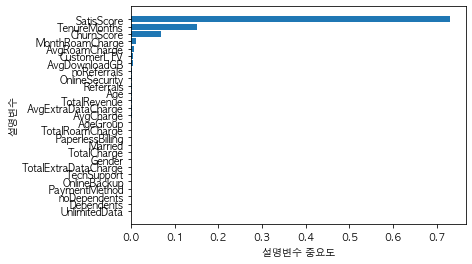

In [43]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [44]:
# 평가
y_pred = tree_uncustomized.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_uncustomized.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.989

Confusion matrix: 
[[1776   14]
 [  13  600]]
              precision    recall  f1-score   support

           0      0.993     0.992     0.992      1790
           1      0.977     0.979     0.978       613

    accuracy                          0.989      2403
   macro avg      0.985     0.985     0.985      2403
weighted avg      0.989     0.989     0.989      2403



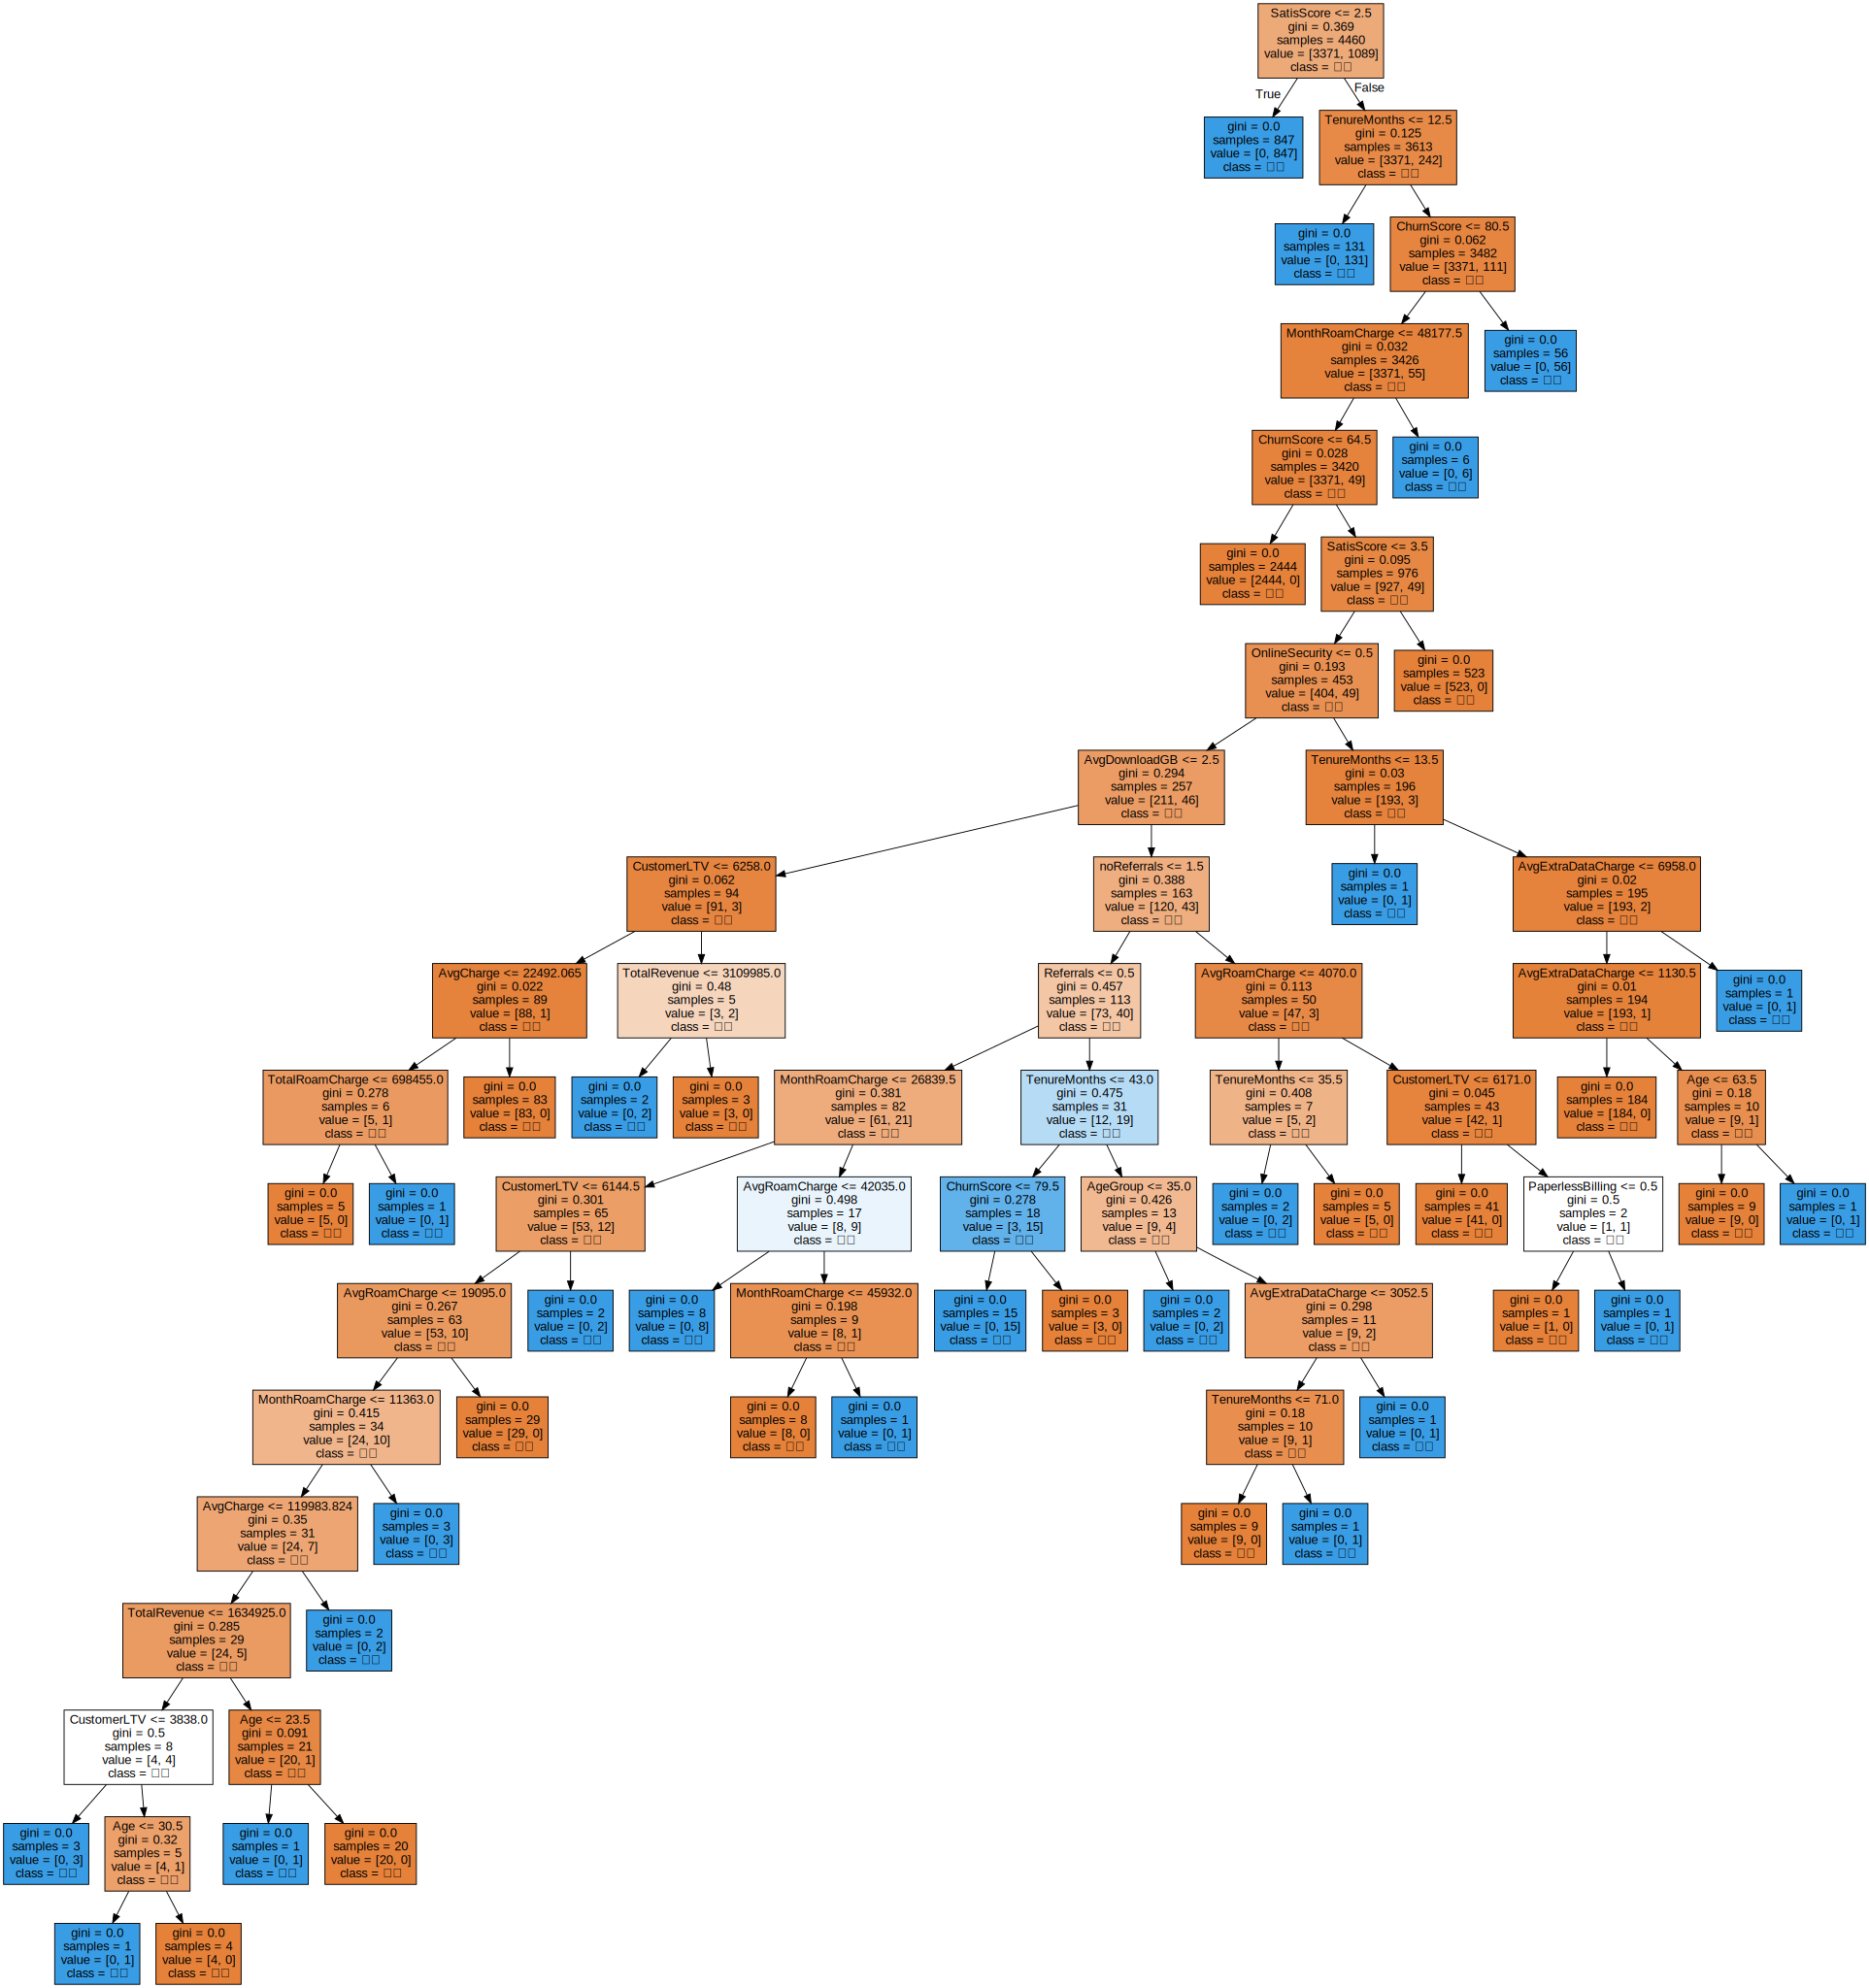

In [45]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_uncustomized, out_file="tree_uncustomized.dot", class_names = ["유지", "이탈"],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_uncustomized.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))